# Investigatin Netflix Movies - Analysis

#### Loading the pandas and matplotlib.pyplot libraries (for data manipulation and visualization, respectively) and reads the netflix_data.csv file. The DataFrame net will store the data for analysis.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

net = pd.read_csv('netflix_data.csv')
net 

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV


## Checking Data

#### Here, the unique contents of the type and release_year columns and the number of null values ​​in each column are checked. These steps are essential to understanding the structure and quality of the data.

In [11]:
print(net['type'].unique()) #unique types
print(net['release_year'].unique()) #unique release years
net.isnull().sum() # Check null values

['TV Show' 'Movie']
[2020 2016 2011 2009 2008 2019 1997 2017 2018 2014 2015 2010 2005 2013
 2012 2006 2000 2003 1989 2004 1977 1971 1993 2007 1998 1988 1996 2002
 1986 1990 1979 1980 1974 2001 1999 1966 1991 1982 1994 1995 1978 1992
 1972 1975 2021 1973 1967 1960 1981 1958 1976 1968 1956 1985 1965 1984
 1983 1987 1945 1946 1962 1925 1942 1969 1955 1963 1964 1954 1970 1944
 1947 1959 1943]


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

#### This code filters only movies released in the 90s, removes null values ​​in the duration column, ensures that duration is numeric, and finds the most frequent duration of films from the 1990s.

In [13]:
movies = net[net['type'] == 'Movie'] # variable for only movies
movies_90s = movies[(movies['release_year'] >= 1990) & (movies['release_year'] <= 1999)] # finding movies only from 90s

movies_90s = movies_90s.dropna(subset=['duration']) # Remove rows with null values in duration column

movies_90s['duration'] = pd.to_numeric(movies_90s['duration'], errors='coerce') # Make sure the column is numeric

frequent_duration = movies_90s['duration'].mode()[0] # finding most frequent movie duration

print(f"The most frequent movie duration in the 90s is {frequent_duration} minutes")

The most frequent movie duration in the 90s is 94 minutes


#### The histogram bellow displays the length distribution of movies from the 90s, highlighting the most common length (red line). Distribution allows us to observe whether films from that period had similar or variable lengths.

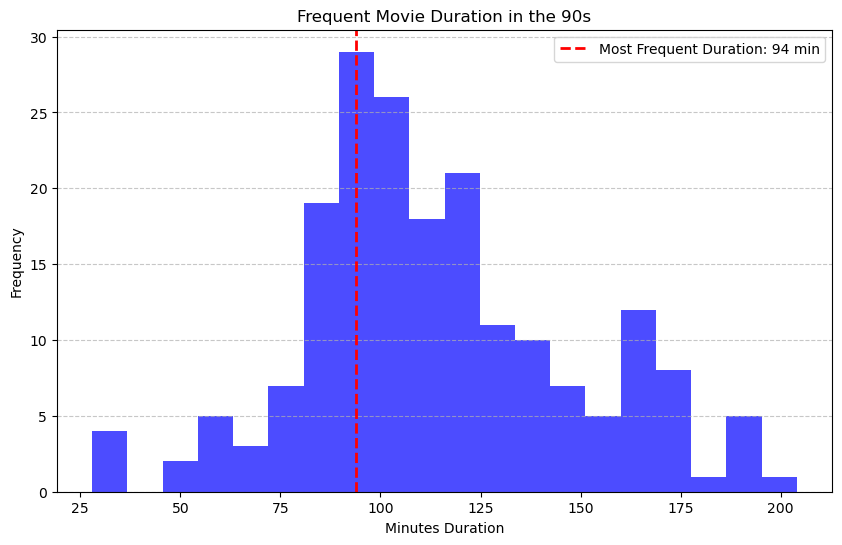

In [39]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(movies_90s['duration'], bins=20, color='blue', alpha=0.7)
plt.axvline(frequent_duration, color='red', linestyle='dashed', linewidth=2, label=f'Most Frequent Duration: {frequent_duration} min')

plt.title('Frequent Movie Duration in the 90s')
plt.xlabel('Minutes Duration')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Selects action movies under 90 minutes released in the 90s and calculates the total number of these films. It helps to understand the presence of short action films at the time.

In [41]:
short_movies = movies_90s[movies_90s['duration'] < 90]
short_action_movies = short_movies[short_movies['genre'] == 'Action']

short_movie_count = len(short_action_movies)

print(f"The number of short action movies released in the 90s is {short_movie_count}")

The number of short action movies released in the 90s is 8


In [16]:
short_movies
len(short_movies)

40

In [43]:
len(movies_90s)

194

### Aditional Cleaning data

#### Removes rows with null values ​​in the duration and genre columns, eliminates duplicates and converts duration and release_year to numeric values, ensuring a more accurate database for analysis.

In [45]:
# Data cleaning

net_cleaned = net.dropna(subset=['duration', 'genre']) # remove rows with null values ​​
net_cleaned = net_cleaned.drop_duplicates() # remove duplicate rows
net_cleaned['duration'] = pd.to_numeric(net_cleaned['duration'], errors='coerce') #Make sure the column is numeric
net_cleaned['release_year'] = pd.to_numeric(net_cleaned['release_year'], errors='coerce') # release years are in integer format



#### This bar graph shows the number of movies released per decade. The decade column is created by dividing the release year by 10 and multiplying by 10, grouping films by decade to analyze release trends.

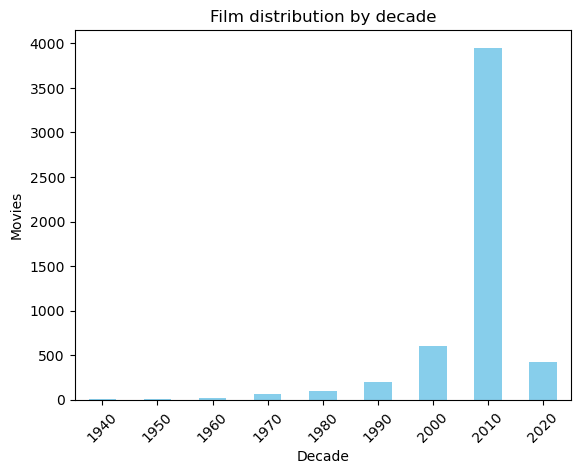

In [47]:
movies = net_cleaned[net_cleaned['type'] == 'Movie'].copy() 
movies = movies.assign(decade=(movies['release_year'] // 10) * 10) # create a new column named decade

decade_counts = movies['decade'].value_counts().sort_index() # count movies by decade

# Bar Chart
ax = decade_counts.plot(kind='bar', title='Film distribution by decade', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Movies')
plt.xticks(rotation=45) 
plt.show()



#### 2010 was the decade with the highest number of released movies.

### The bar chart bellow displays the average length of movies by decade, allowing you to see whether the average length has increased or decreased over the years.

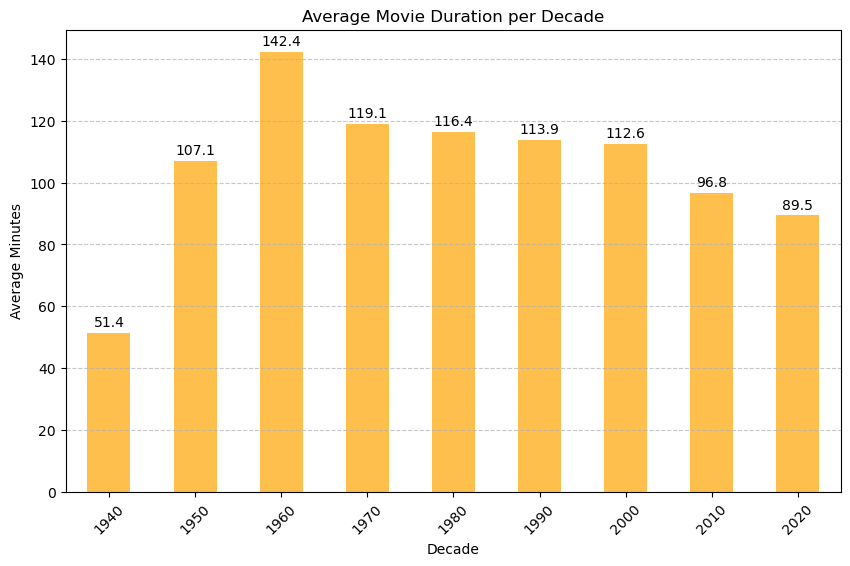

In [49]:
movies = net_cleaned[net_cleaned['type'] == 'Movie'].copy() # only movies sorted

movies.loc[:, 'decade'] = (movies['release_year'] // 10) * 10 #decade column

average_duration = movies.groupby('decade')['duration'].mean() #average movie duration

# Bar chart
plt.figure(figsize=(10, 6))
average_duration.plot(kind='bar', color='orange', alpha=0.7)

# Add average duration labels to the chart
for index, value in enumerate(average_duration):
    plt.text(index, value + 1, f'{value:.1f}', ha='center', va='bottom')

plt.title('Average Movie Duration per Decade')
plt.xlabel('Decade')
plt.ylabel('Average Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### As shown in the graph, with each decade the length of films has been slowly decreasing.

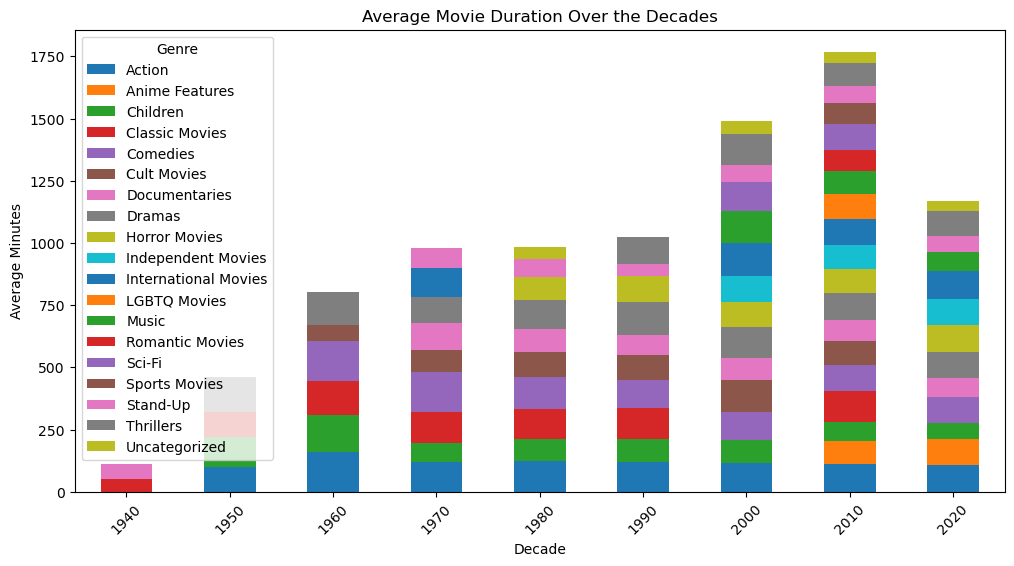

In [17]:
movies = movies.assign(decade=(movies['release_year'] // 10) * 10) # assign does not modify the original DataFrame

# Group by decade and genre
average_duration_by_genre = movies.groupby(['decade', 'genre'])['duration'].mean().unstack()

# Stacked bar chart
average_duration_by_genre.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Movie Duration Over the Decades')
plt.xlabel('Decade')
plt.ylabel('Average Minutes')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()


#### In this stacked bar chart we clearly don't see much difference in the length of movies comparing by genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Anime Features'),
  Text(2, 0, 'Children'),
  Text(3, 0, 'Classic Movies'),
  Text(4, 0, 'Comedies'),
  Text(5, 0, 'Cult Movies'),
  Text(6, 0, 'Documentaries'),
  Text(7, 0, 'Dramas'),
  Text(8, 0, 'Horror Movies'),
  Text(9, 0, 'Independent Movies'),
  Text(10, 0, 'International Movies'),
  Text(11, 0, 'LGBTQ Movies'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Romantic Movies'),
  Text(14, 0, 'Sci-Fi'),
  Text(15, 0, 'Sports Movies'),
  Text(16, 0, 'Stand-Up'),
  Text(17, 0, 'Thrillers'),
  Text(18, 0, 'Uncategorized')])

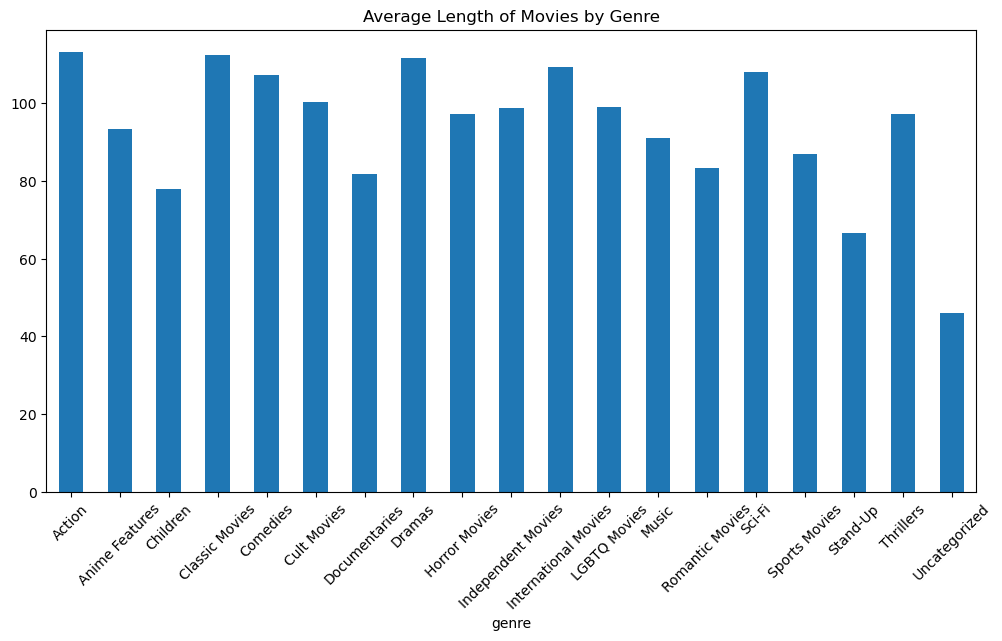

In [27]:
# Avg by genre
avg_duration_genre = movies.groupby('genre')['duration'].mean()
avg_duration_genre.plot(kind='bar', figsize=(12, 6), title="Average Length of Movies by Genre")
plt.xticks(rotation=45)


#### The graph shows that genres like Action, Sci-Fi, and Independent Movies have longer average runtimes, generally over 100 minutes. Stand-Up and Children are the shortest genres, lasting around 60 minutes. Most other genres have an average length of between 80 and 90 minutes, reflecting a consistency in the time needed to tell their stories.

#### Bellow I have gathered the top 5 longer genre movie duration

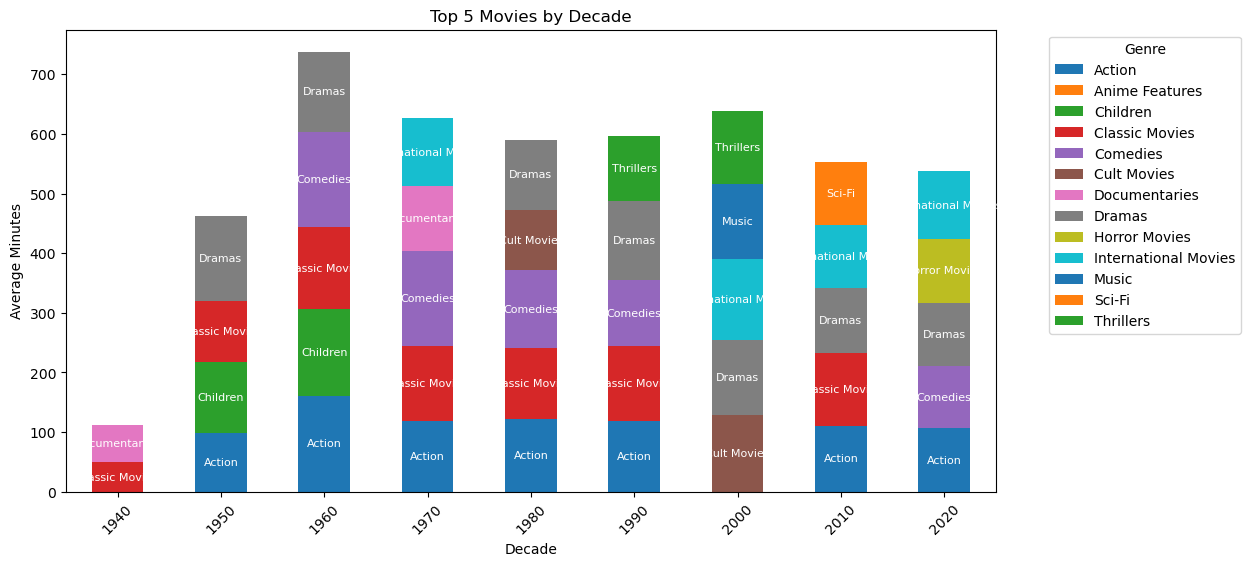

In [46]:
# Top 5 genre movie durations
top_genres_by_decade = average_duration_by_genre.apply(lambda x: x.nlargest(5), axis=1)

# Stacked bar chart
ax = top_genres_by_decade.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add labels with genre names inside the bars
for i, (decade, row) in enumerate(top_genres_by_decade.iterrows()):
    for j, value in enumerate(row):
        if value > 0:  
            ax.text(
                i,                                   # x position
                row.cumsum().iloc[j] - value / 2,  # y position
                row.index[j],                       # Label genre
                ha='center', va='center', fontsize=8, color='white', rotation=0 
            )


plt.title('Top 5 Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Minutes')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


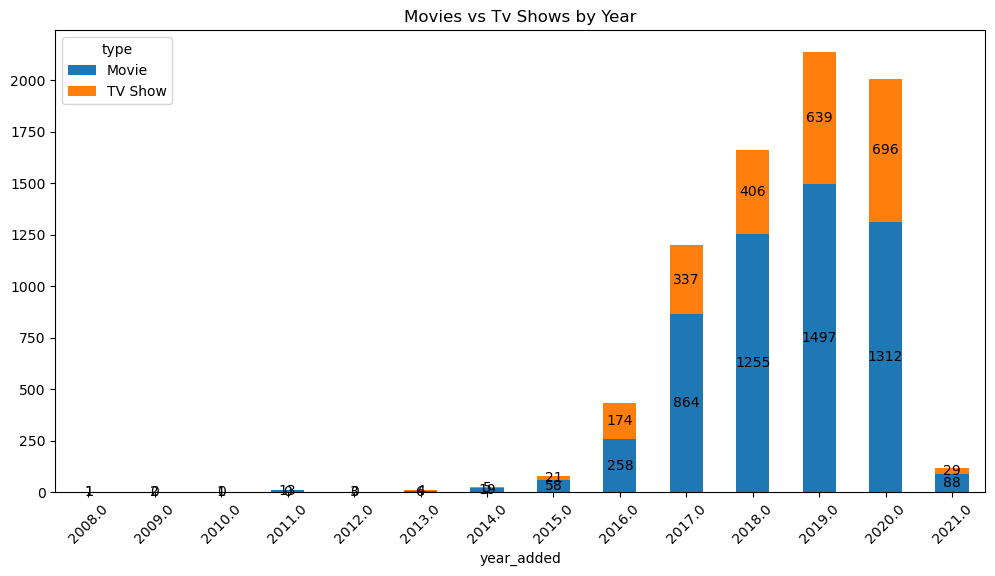

In [92]:
import matplotlib.pyplot as plt

net['date_added'] = pd.to_datetime(net['date_added'], errors='coerce')

# Create the 'year_added' column by extracting the year from the 'date_added' column
net['year_added'] = net['date_added'].dt.year

# Count numb of movies n tv shows
content_type_by_year = net.groupby(['year_added', 'type']).size().unstack(fill_value=0)

ax = content_type_by_year.plot(kind='bar', stacked=True, figsize=(12, 6), title="Movies vs Tv Shows by Year")

for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.xticks(rotation=45)
plt.show()


#### This graph shows the number of movies and TV shows added to the Netflix catalog over the years. It can be seen that from 2016 onwards there was a significant increase in the number of films and series added to the Netflix catalogue, reflecting the expansion of the Platform in this period. It is also noted that films are mostly more frequent, possibly due to lower cost and production time compared to TV shows. In 2020 there was a drop, possibly due to the pandemic.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'France'),
  Text(6, 0, 'South Korea'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Australia')])

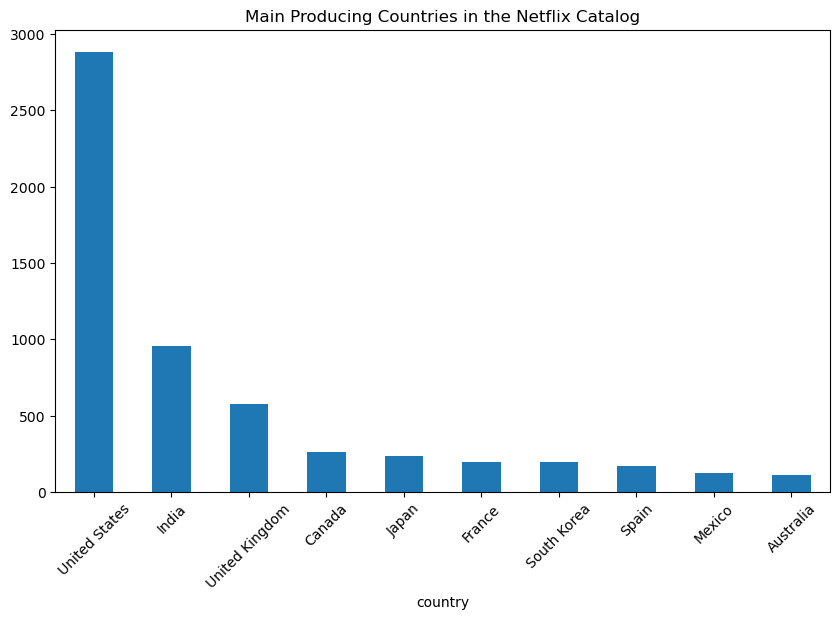

In [67]:
country_counts = net['country'].value_counts()

country_counts.head(10).plot(kind='bar', figsize=(10, 6), title="Main Producing Countries in the Netflix Catalog")
plt.xticks(rotation=45)

#### The USA dominates the production of movies in the Netflix catalogue, followed by India and the UK. Neflix is ​​an American company, so it makes sense to have its largest film production in the US

## CONCLUSION

### Based on the analysis, the results showed that while there are significant variations in the duration of movies across decades, it was not possible to identify a clear, consistent trend of decreasing duration over time. This study gave us a better understanding of how movies have changed over time, but it opens the door for further research, perhaps analyzing other aspects such as production budgets or shifts in audience preferences, consumption has changed and many streaming prioritize movies that can be consumed quickly.
